# Ayyoub el hariri- amin toumi - mohamed mouiti - said laghzil - 

# analyse sur l'evolution de bitcoin 




In [81]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  StratifiedKFold 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  
from sklearn.datasets import load_iris
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [82]:
url=r"D:\ENSIAS\maching_learning\bt-er-a1.csv"
dataset= read_csv(url,index_col='Date',parse_dates=True)
dataset.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-24,8451.247070,8517.568359,8057.478516,8058.640137,8058.640137,2.981187e+10
2020-05-25,8054.734375,8213.675781,7998.595215,8170.750000,8170.750000,2.870210e+10
2020-05-26,8173.182129,8218.972656,7980.670898,8047.231445,8047.231445,2.694616e+10
2020-05-27,8049.352051,8374.552734,8047.246094,8334.069336,8334.069336,2.972022e+10


Pour voir l'evolution on peut voire la close

on doit indiquer aussi a Pandas que le champs parse_dates  c'est a dire index le rendre un champs interpretable  

In [83]:
dataset.isnull().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [85]:
dataset.isnull().sum()

Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [9]:
dataset.shape

(366, 6)

In [10]:
dataset.index

DatetimeIndex(['2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31',
               '2020-06-01', '2020-06-02',
               ...
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

In [87]:
import numpy as np 
from sklearn.impute import SimpleImputer
# 'np.nan' signifies that we are targeting missing values
# and the strategy we are choosing is replacing it with 'mean'
dataset=dataset.copy()
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset.iloc[:,0:6])
dataset.iloc[:,0:6]=imputer.transform(dataset.iloc[:,0:6])
dataset


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-24,8451.247070,8517.568359,8057.478516,8058.640137,8058.640137,2.981187e+10
2020-05-25,8054.734375,8213.675781,7998.595215,8170.750000,8170.750000,2.870210e+10
2020-05-26,8173.182129,8218.972656,7980.670898,8047.231445,8047.231445,2.694616e+10
2020-05-27,8049.352051,8374.552734,8047.246094,8334.069336,8334.069336,2.972022e+10
2020-05-28,8337.633789,8619.314453,8314.090820,8599.190430,8599.190430,3.102422e+10
...,...,...,...,...,...,...
2021-05-20,30198.798828,34775.445313,28776.099609,33359.136719,33359.136719,7.221216e+10
2021-05-21,33207.167969,34471.406250,27599.712891,30627.822266,30627.822266,6.736585e+10
2021-05-22,30682.289063,31880.994141,29050.640625,30818.250000,30818.250000,4.710777e+10


In [16]:
dataset.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

on' a remplacé des données manquantes par la moyenne pour tout les champs 

In [17]:
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

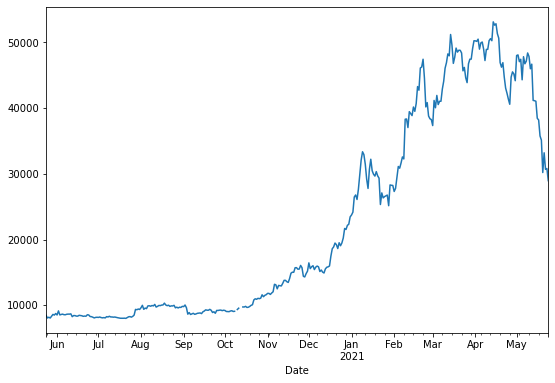

In [7]:
dataset['Open'].plot(figsize=(9,6))
plt.show()

d'apres la visualisation du graphe, on voit que de la courbe  commence avec un pourcentage presque constant  mais le mois octobre il commence a augmenter surtout janvier 2021 

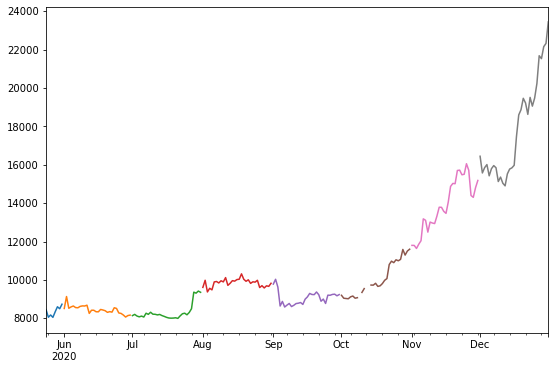

In [55]:
dataset.loc['2020','Open'].resample('M').plot(figsize=(9,6))
plt.show()


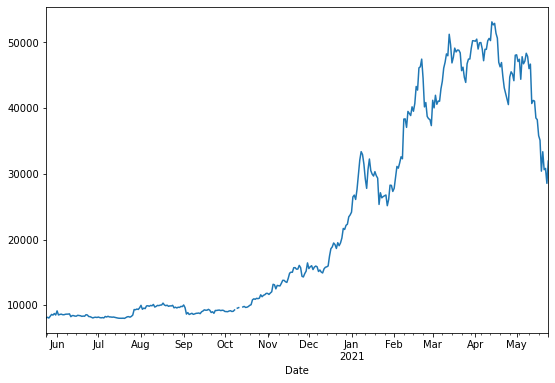

In [3]:
dataset['Close'].plot(figsize=(9,6))
plt.show()

maintenant c'est bien car on doit profiter de pandas car il connait tres bien le jour le mois et l'annee.. pour effectuer plus d'instruction

et c'est on veut voir l'evolution du bitcoin dans l'annee 2020 il suffit d'executer  le code:

<AxesSubplot:xlabel='Date'>

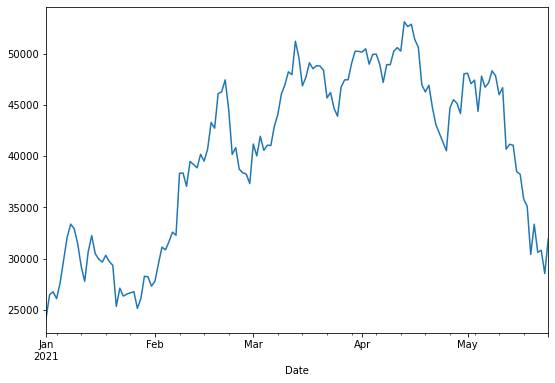

In [24]:
dataset['2021']['Close'].plot(figsize=(9,6))

donc on peut voir clairement le graphe si on veut effectuer sur l'annee et le mois il suffit d'ajouter -mois

<AxesSubplot:xlabel='Date'>

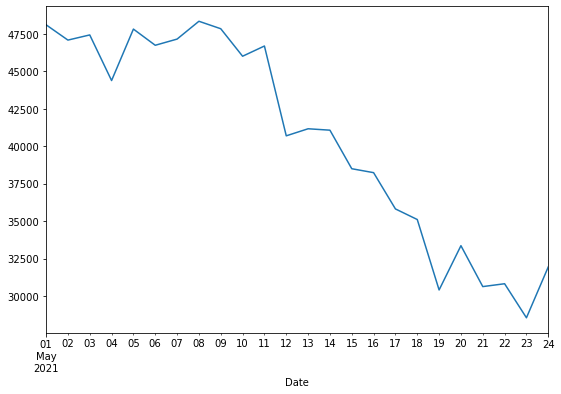

In [23]:
dataset['2021-5']['Close'].plot(figsize=(9,6))

on peut voir pour 2020-2021 que la courbe elle commence constante avec quelque deviation a partir du 3 mais le 11 a commencé  la descendante jusqu' le 23  

/

<AxesSubplot:xlabel='Date'>

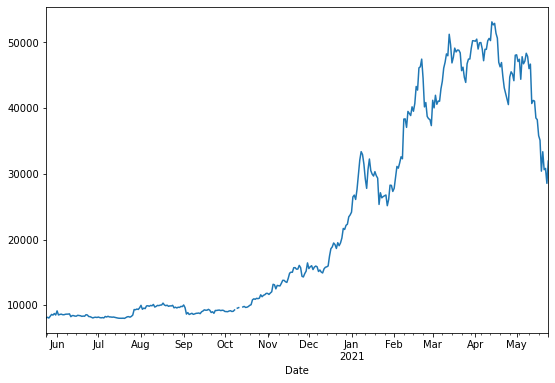

In [4]:
dataset['2020':'2021']['Close'].plot(figsize=(9,6))

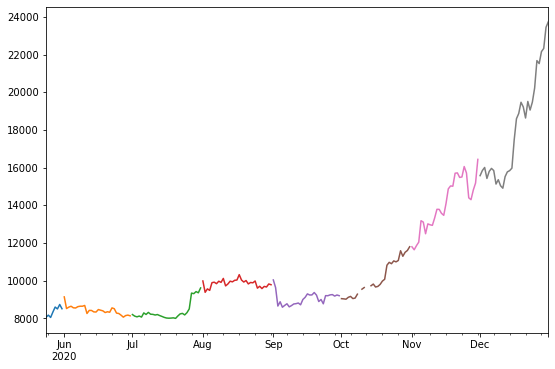

In [51]:
dataset.loc['2020','Close'].resample('M').plot(figsize=(9,6))
plt.show()

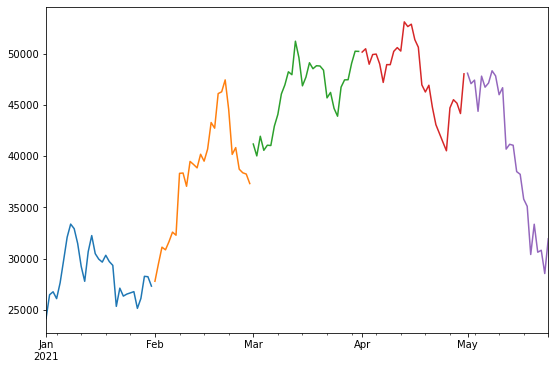

In [55]:
dataset.loc['2021','Close'].resample('M').plot(figsize=(9,6))
plt.show()

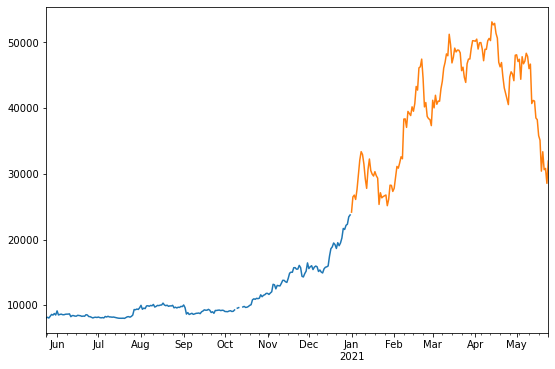

In [61]:
dataset.loc['2020':'2021','Close'].resample('A').plot(figsize=(9,6))
plt.show()

on observe different paquet de donner pour chaque mois  alors qui dit courbe de donner dit statistique

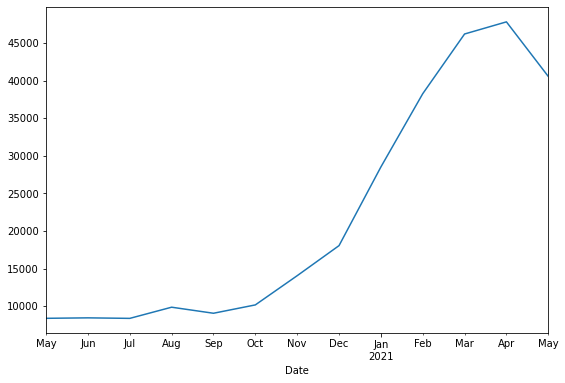

In [62]:
dataset.loc['2020':'2021','Close'].resample('M').mean().plot(figsize=(9,6))
plt.show()

si on applique la moyenne sur chaque mois on peut vois l'evolution 

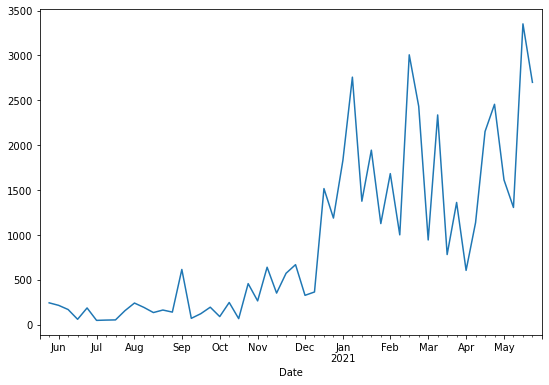

In [66]:
dataset.loc['2020':'2021','Close'].resample('W').std().plot(figsize=(9,6))
plt.show()

meme chose si on veut voit l'evolution en fonction de semaine

 l'ecart type et relatif ,meme si il commence au debut avec
 un niveau constaNt

<AxesSubplot:xlabel='Date'>

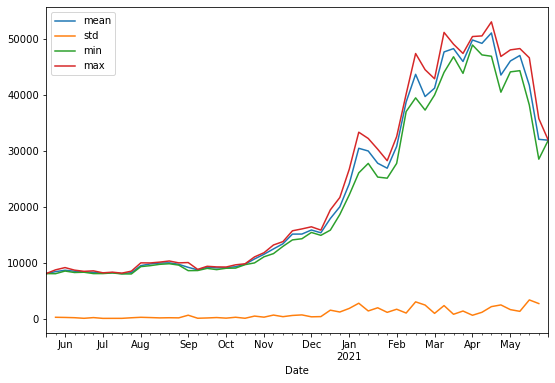

In [69]:
dataset.loc['2020':'2021','Close'].resample('W').agg(['mean','std','min','max']).plot(figsize=(9,6))


un graphe avec les different statistique la moyenne , la variance le min et le max

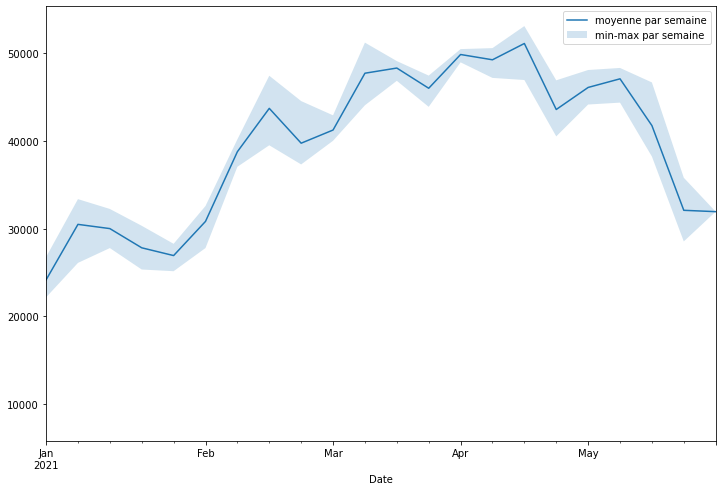

In [72]:
m=dataset['Close'].resample('W').agg(['mean','std','min','max'])
plt.figure(figsize=(12,8))

m['mean']['2021'].plot(label='moyenne par semaine')
plt.fill_between(m.index,m['max'],m['min'],alpha=0.2,label='min-max par semaine')
plt.legend()
plt.show()

j'ai stocke un tableau agregate dans un variable m , puis j'ai creé un graphique puis j'ai afficher la moyenne de 2020 par chaque semaine et j'ai utilisé la fonction fill_between de matloplib afin de creer cette zone d'incertitude entre le maximum et le minimum pour chaque semaine

In [6]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-24,8451.247070,8517.568359,8057.478516,8058.640137,8058.640137,2.981187e+10
2020-05-25,8054.734375,8213.675781,7998.595215,8170.750000,8170.750000,2.870210e+10
2020-05-26,8173.182129,8218.972656,7980.670898,8047.231445,8047.231445,2.694616e+10
2020-05-27,8049.352051,8374.552734,8047.246094,8334.069336,8334.069336,2.972022e+10
2020-05-28,8337.633789,8619.314453,8314.090820,8599.190430,8599.190430,3.102422e+10
...,...,...,...,...,...,...
2021-05-20,30198.798828,34775.445313,28776.099609,33359.136719,33359.136719,7.221216e+10
2021-05-21,33207.167969,34471.406250,27599.712891,30627.822266,30627.822266,6.736585e+10
2021-05-22,30682.289063,31880.994141,29050.640625,30818.250000,30818.250000,4.710777e+10


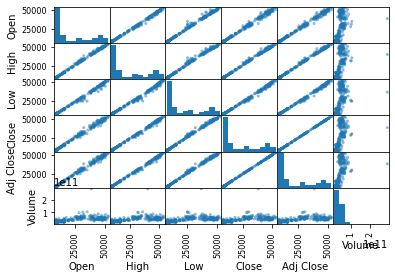

In [7]:
scatter_matrix(dataset)
pyplot.show()

Text(0, 0.5, 'Open')

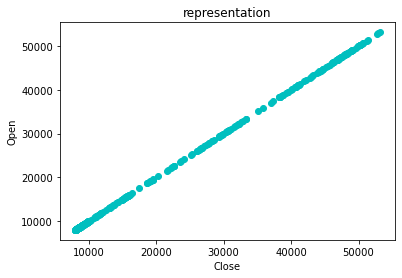

In [8]:
#colors={0:'r',1:'b'}
fig, ax=plt.subplots()
for i in range(len(dataset['Close'])):
    ax.scatter(dataset['Close'][i], dataset['Adj Close'][i],color='c')
ax.set_title('representation')
ax.set_xlabel('Close')
ax.set_ylabel('Adj Close')

donc Une representation qu'est lineaire 

In [9]:
dataset.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

# 1 MLPClassifier

In [90]:
dataset=dataset.astype('int') 
array = dataset.values
X = array[:,0:5]
Y = array[:,5]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y , test_size=0.25)
 

In [11]:
from sklearn.neural_network import  MLPClassifier 
mlp =  MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(13),  max_iter=1000)
print("Without CV")
mlp.fit(X_train,Y_train)

Without CV


MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=13,
              max_iter=1000, solver='lbfgs')

In [12]:
print("Training set score: %f"  % mlp.score(X_train, Y_train))
print("Test     set   score: %f"  %  mlp.score(X_validation, Y_validation))
print("With   CrosV")
kfold=StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
cv_results =cross_val_score(mlp, X,Y,cv=kfold, scoring='accuracy')
print('MLP:  %f'%  (cv_results.mean()*100))

Training set score: 1.000000
Test     set   score: 1.000000
With   CrosV
MLP:  100.000000


on'a trouvé beacoup de prob au niveau de test split car le problem de convertion de dataset il arrete la compilation, la seule solution que j'ai trouvé c'est de convertir la dataset en type int comme ca elle  sera interpretable, et aussi j'ai changé les valeurs manquantes, et apres l'etapê de la validation du modele j'ai trouvé que c'est 100%

*

*

*

*

je vais remplacer les valeurs nan par une strategie de ' most_frequent '

In [13]:
import numpy as np 
from sklearn.impute import SimpleImputer
# 'np.nan' signifies that we are targeting missing values
# and the strategy we are choosing is replacing it with 'mean'
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(dataset.iloc[:,0:5])
dataset.iloc[:,0:5]=imputer.transform(dataset.iloc[:,0:5])
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-24,8451,8517,8057,8058,8058,-2147483648
2020-05-25,8054,8213,7998,8170,8170,-2147483648
2020-05-26,8173,8218,7980,8047,8047,-2147483648
2020-05-27,8049,8374,8047,8334,8334,-2147483648
2020-05-28,8337,8619,8314,8599,8599,-2147483648
...,...,...,...,...,...,...
2021-05-20,30198,34775,28776,33359,33359,-2147483648
2021-05-21,33207,34471,27599,30627,30627,-2147483648
2021-05-22,30682,31880,29050,30818,30818,-2147483648


In [51]:
dataset.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [59]:
dataset=dataset.astype('int') 
array = dataset.values
X = array[:,0:6]
Y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y , test_size=0.25)

In [60]:
from sklearn.neural_network import MLPClassifier 
mlp =  MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(13),  max_iter=100)
print("Without CV")
mlp.fit(X_train,Y_train)

Without CV


MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=13,
              max_iter=100, solver='lbfgs')

In [61]:
print("Training set score: %f"  % mlp.score(X_train, Y_train))
print("Test     set   score: %f"  %  mlp.score(X_validation, Y_validation))
print("With   CrosV")
kfold=StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
scores =cross_val_score(mlp, X,Y,cv=kfold, scoring='accuracy')
print('MLP :  %0.00f'%  (scores.mean()*100)+'%')

Training set score: 1.000000
Test     set   score: 1.000000
With   CrosV
MLP :  100%


# LinearRegression

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [70]:
print("Training set score: %f"  % regressor.score(X_train, Y_train))
print("Test     set   score: %f"  %  regressor.score(X_validation, Y_validation))
print("With   CrosV")
scores = cross_val_score(regressor, X_train,Y_train, scoring='r2', cv=5)
print('Regression lineaire :  %0.00f'%  (scores.mean()*100)+'%')

Training set score: 1.000000
Test     set   score: 1.000000
With   CrosV
Regression lineaire :  100%


apres l'application du modele de regression lineare ainsi que MLPClassifier et apres la cross validation on trouve un pourcentage de 100%

 # PCA et SVM
 

In [62]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
array = dataset.values
x= array[:,0:6]
principalComponents_breast = pca_breast.fit_transform(x)

In [65]:
target = dataset['Open']

In [66]:
p_Df = pd.DataFrame(data = principalComponents_breast, columns = ['champ1', 'champ2'])
p_Df

,champ1,champ2
0,-32125.516863,381.200946
1,-32368.919627,-77.029808
2,-32431.198780,117.953707
3,-32128.802996,-182.419400
4,-31534.492238,-176.036579
...,...,...
361,21315.328438,-1507.006313
362,19569.656571,3120.431416
363,18036.115292,116.275302
364,14385.773694,2637.627769


In [40]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [70]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, p_Df, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.08108108 0.         0.         0.02702703 0.02702703 0.
 0.         0.02777778 0.         0.        ]


In [71]:
round(np.mean(score)*100)

2